# Redes Neurais 

Capítulo 10: Introdução ás Reds Neurais Artificiais com a biblioteca Keras 

* PERCEPTRON 

A scikit-Learn fornece uma classe perceptron que implementa uma rede TLU única. Ela pode ser usada como se espera - por exemplo, no conjunto de dados da íris :

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:

iris = load_iris()
X = iris.data[:, (2, 3)]  # comprimento da pétala, largura da pétala 
y = (iris.target == 0).astype(np.int) #Irís setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

C:\Users\aluga.com\AppData\Local\Temp\ipykernel_8792\144734294.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) #Irís setosa


array([1])

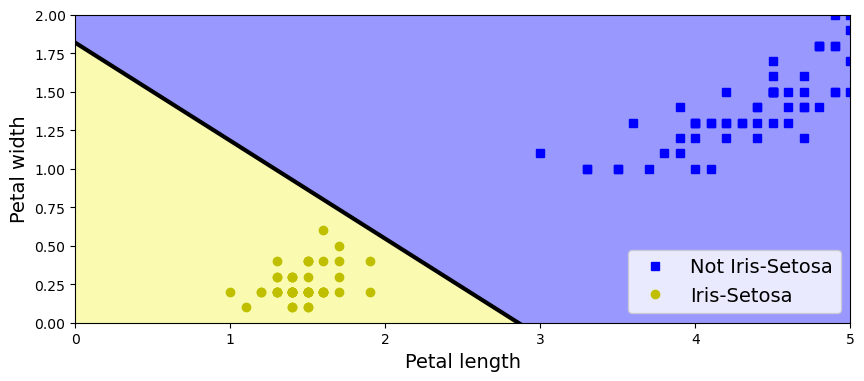

In [3]:
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

### * Construindo um classificador de imagem usando a sequential API 

 primeiro, temos que carregar um conjunto de dados, vamos usar o Fashion MNIST, um substituto direto do MNISTT. Ele tem exatamente o mesmo formato do MNIST (70 mil imagens em escala de cinza de 28 x 28 pixels cada, com 10 classes), porém as imagens representam artigos da moda em vez de algarismo manustricos.Desse modo , cada classe é mais diversificada e o probelma cada sendo substancialmente mais desafiador.

In [4]:
para aqui 

SyntaxError: invalid syntax (4149200854.py, line 1)

In [ ]:
!pip install tensorflow

In [5]:
# instalando a TensorFlow2
import tensorflow as tf
from tensorflow import keras

In [6]:
# usando a keras para carregar o conjunto de dados 

#Vamos começar carregando o conjunto de dados MNIST de moda. Keras tem várias funções para carregar conjuntos de dados populares em keras.datasets. 
# O conjunto de dados já está dividido para você entre um conjunto de treinamento e um conjunto de teste, mas pode ser útil dividir ainda mais 
#o conjunto de treinamento para ter um conjunto de validação:
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
# O conjunto de treinamento contém 60.000 imagens em tons de cinza, cada uma com 28x28 pixels:
X_train_full.shape

(60000, 28, 28)

In [8]:
# Cada intensidade de pixel é representada como um byte (0 a 255): 0,0
X_train_full.dtype

dtype('uint8')

In [9]:
# Vamos dividir o conjunto de treinamento completo em um conjunto de validação e um conjunto de treinamento (menor). 
# Também reduzimos as intensidades de pixel para o intervalo 0-1 e as convertemos em flutuantes, dividindo por 255.

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

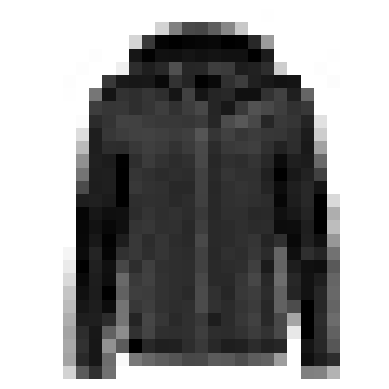

In [10]:
# plotar uma imagem usando a função imshow() do Matplotlib, com um mapa de cores 'binário':
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [11]:
# lista de nomes de classe para saber o que são as imagens: 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
# a primeira imagem no conjunto de treinamento representa um casaco ["coat"]:
class_names[y_train[0]]

'Coat'

In [13]:
# O conjunto de validação contém 5.000 imagens e o conjunto de teste contém 10.000 imagens:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

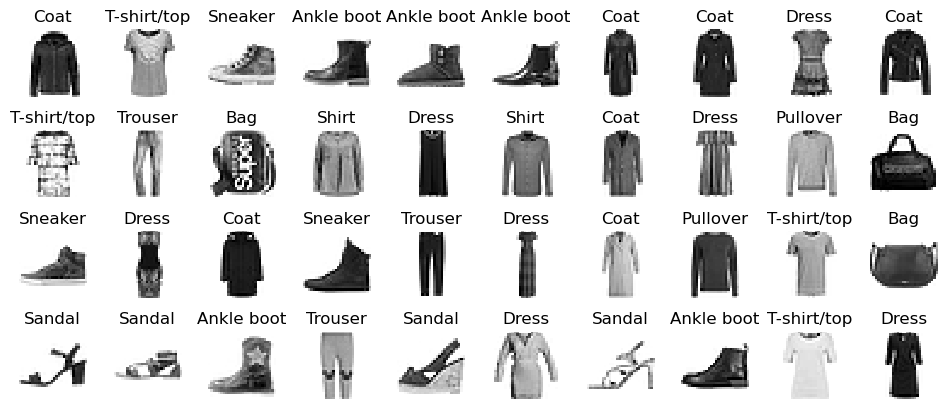

In [15]:
# Verificando uma amostra das imagens no conjunto de dados:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [16]:
# constrindo a rede neural ! 
# aqui temos uma classificação MLP com duas camadas ocultas:
model = keras.models.Sequential() # cria o modelo 
model.add(keras.layers.Flatten(input_shape=[28, 28])) # primeira camada faz o pré-processamento
model.add(keras.layers.Dense(300, activation="relu")) # primeira camada oculta com 300 neurônios e usa  a função de ativação ReLu 
model.add(keras.layers.Dense(100, activation="relu")) # segunda camada oculta com 100 neurônios e usa  a função de ativação ReLu 
model.add(keras.layers.Dense(10, activation="softmax")) # última camada, camada de saída com 10 neurônios(um por calsse)e função de ativação softmax

In [17]:
# limpa a sessão atual do backend do Keras e estabelece as sementes aleatórias para o NumPy e o TensorFlow.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
# fazendo a mesmo coisa, porém adicionando em uma lista
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


As camadas Dense geralmente tem muitos parâmetros, exemplo, a primeir camada oculta tem pesos de conexão de 784x300, além de 300 vieses que somam 235.500 parâmetros.
    Isso viabiliza ao modelo bastante flexibilidade para ajustar os dados de reinamento, mas significa também que o modelo corre o risco de
sobreajuste, principalmente quando não tem muitos dados de treinamento. 

In [20]:
# visualizando todos os parâmetros de uma camada

pesos, vieses = (model.layers[1]).get_weights()

In [21]:
pesos

array([[-0.05567838, -0.02491163,  0.00471409, ..., -0.00606771,
        -0.05647357,  0.01526204],
       [ 0.02377967,  0.06471403,  0.05395417, ...,  0.03381725,
        -0.01200629,  0.00071212],
       [-0.06482355,  0.04124294, -0.02332684, ...,  0.0668789 ,
         0.04965989,  0.04659119],
       ...,
       [ 0.01122047, -0.02271247, -0.04917596, ..., -0.06761794,
         0.00773592,  0.05857049],
       [ 0.02427415,  0.04984362,  0.00643079, ..., -0.01695004,
        -0.0580266 , -0.00603328],
       [-0.05693338, -0.05661825, -0.00304023, ..., -0.06629194,
        -0.00912281, -0.01841502]], dtype=float32)

In [22]:
vieses

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
vieses.shape

(300,)

# CLASSIFICAÇÃO 

OS PARÂMETROS PARA O MODELO DE REDE NEURAL TEMOS: 
* função de perda é **sparse_categorical_crossentropy**, que é adequada para problemas de classificação multiclasse onde os rótulos de destino são inteiros.
* otimizador é **sgd**, que significa *Stochastic Gradient Descent. O SGD é um algoritmo popular de otimização usado em muitos modelos de aprendizado de máquina e redes neurais.
* metrica usada é a **acuracia** 

In [24]:
# código configura o modelo usando a função de perda sparse_categorical_crossentropy, 
# o otimizador SGD e medir a precisão do modelo durante o treinamento.
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [25]:
# treinando e avaliando o modelo
MODELO = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7129 - accuracy: 0.7677 - val_loss: 0.5163 - val_accuracy: 0.8286
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4840 - accuracy: 0.8316 - val_loss: 0.4346 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4395 - accuracy: 0.8457 - val_loss: 0.5305 - val_accuracy: 0.8040
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4125 - accuracy: 0.8561 - val_loss: 0.3891 - val_accuracy: 0.8668
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3942 - accuracy: 0.8630 - val_loss: 0.3737 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3752 - accuracy: 0.8687 - val_loss: 0.3668 - val_accuracy: 0.8768
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3631 - accuracy: 0.8729 - val_loss: 0.3580 - val_accuracy:

a saída retorno duas metricas(perda e acuracia), a primeira é refente ao coonjunto de treinamento e a segunda é o conjunto de validação. 

-> é possivel utilizar validation_split=0.1 no lugar de validation_data, isso informa para utilizar os ultimos 10% dos dados para validação.
(opcional)

     importante notar que a perda no treinamento diminuiu conforme a épocas aumentou, o mesmo aconteuceu com a acurácia 

In [26]:
MODELO_2 = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1547/1547 [==============================] - 7s 5ms/step - loss: 0.2204 - accuracy: 0.9213 - val_loss: 0.2448 - val_accuracy: 0.9113
Epoch 2/30
1547/1547 [==============================] - 7s 5ms/step - loss: 0.2167 - accuracy: 0.9227 - val_loss: 0.2325 - val_accuracy: 0.9169
Epoch 3/30
1547/1547 [==============================] - 8s 5ms/step - loss: 0.2138 - accuracy: 0.9241 - val_loss: 0.2255 - val_accuracy: 0.9185
Epoch 4/30
1547/1547 [==============================] - 7s 5ms/step - loss: 0.2097 - accuracy: 0.9249 - val_loss: 0.2280 - val_accuracy: 0.9167
Epoch 5/30
1547/1547 [==============================] - 8s 5ms/step - loss: 0.2067 - accuracy: 0.9266 - val_loss: 0.2313 - val_accuracy: 0.9131
Epoch 6/30
1547/1547 [==============================] - 8s 5ms/step - loss: 0.2036 - accuracy: 0.9271 - val_loss: 0.2356 - val_accuracy: 0.9147
Epoch 7/30
1547/1547 [==============================] - 8s 5ms/step - loss: 0.1994 - accuracy: 0.9282 - val_loss: 0.2273 - val_accuracy:

-> se o conjunto de treinamento estimer muito assimetrico (algumas classes têm muitas mais amostras do que outras, o que pode afetar o desempenho do modelo de aprendizado de máquina treinado com esses dados.) é útil definir o argumento class_weight ao chamar o fit(), assim daria peso maior ás clases menos representadas e um peso menor as classes em excesso. 

In [27]:
# parâmetros de treinamento
MODELO.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
# listas de épocas pelas quais o modelo passou 
print(MODELO.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [29]:
# perdas e métricas extras calculadas no fim de cada época 
MODELO.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

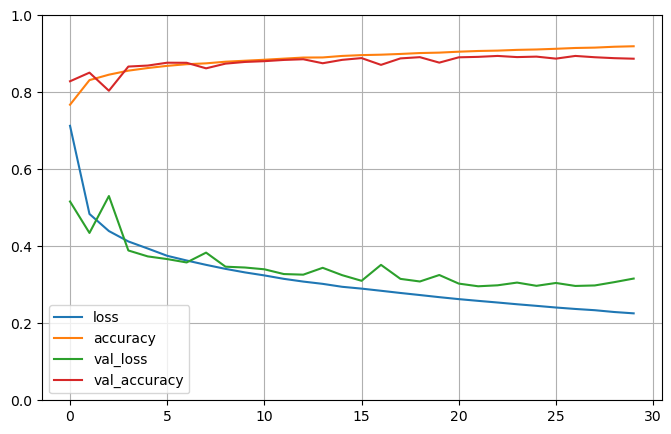

In [30]:
# Obteno as curvas de aprendizado 
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(MODELO.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # intervalo vertical para [0-1]
plt.show()

-> obteve melhor desempenho no conjunto de treinamento 

In [31]:
# 
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.3441 - accuracy: 0.8885


[0.34405386447906494, 0.8884999752044678]

In [32]:
# Fazendo predições 
# sem observações novas usamos as 3 primeiras observações do conjunto de teste 
X_new = X_test[:3]
y_proba = model.predict(X_new) 
y_proba.round(3) # arredonda para 2 casas decimais 

1/1 [==============================] - 0s 201ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
        0.997],
       [0.   , 0.   , 0.996, 0.   , 0.004, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [33]:
# para descobrir  a classe com maior probabilidade estimada: (predict_classes não funciona mais)
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 38ms/step
[9 2 1]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

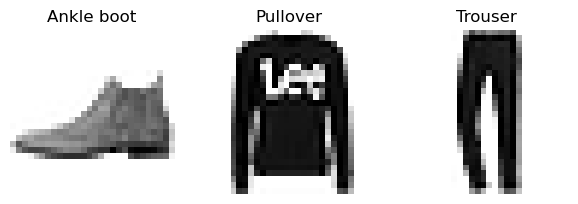

In [34]:
# visualizando as três classificações 

plt.figure(figsize=(7.2, 2.4)) # o tamanho da figura 
for index, image in enumerate(X_new):  # index representa a posição da imagem no conjunto de dados
    plt.subplot(1, 3, index + 1) #  criar um subgráfico e posicionar a imagem na posição adequada no subplot.
    plt.imshow(image, cmap="binary", interpolation="nearest") # exibir a imagem no subgráfico
    plt.axis('off') # ocultar os eixos
    plt.title(class_names[y_test[index]], fontsize=12) # titulo 
plt.subplots_adjust(wspace=0.2, hspace=0.5) # ajustar a distância entre os subgráficos, wspace(horizontal) e hspace(vertical)
plt.show()

# REGRESSÃO

sobre os dados: é um conjunto de dados de imóveis da Califónia, contendo apenas valores númericos e não existe valores ausentes. 

In [35]:
# BIBLIOTECAS 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#carregando o conjunto de dados 
housing = fetch_california_housing()


In [36]:
# separando em treino, teste e validação 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [37]:
# padronizar e garantir que todas as variáveis tenham a mesma importância durante o treinamento do modelo.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

 usando MLP de regressão para fazer predições 
 
    -> camada de saída com 1 único neurônio, ñ usar nenhuma função de ativação, a função de perda é o erro médio quadrático.
o conjunto de dados tem bastante ruído, utiliza-se apenas uma camada oculta com menos neurônios para evitar excesso de sobreajuste

In [39]:
model_r = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), # Camada oculta
    keras.layers.Dense(1)]) # camada saída

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [40]:
# configurando o modelo
model_r.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

#treinando o modelo 
MODELO_R = model_r.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.0148 - val_loss: 1.3578
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8529 - val_loss: 0.7790
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7705 - val_loss: 0.7190
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7259 - val_loss: 0.6723
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6897 - val_loss: 0.6431
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6571 - val_loss: 0.6231
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6291 - val_loss: 0.6280
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6041 - val_loss: 0.5729
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5808 - val_loss: 0.5614
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5601 - val_loss: 0.5778

In [41]:
# 
mse_test = model_r.evaluate(X_test, y_test)
print(mse_test)
print(" ")

# utilizando as 3 primeiras observações do conjunto teste 
X_new = X_test[:3]
print(X_new)
print(" ")

# predizendo as 3 primeiras observações 
y_pred = model_r.predict(X_new)
print(y_pred)

162/162 [==============================] - 1s 3ms/step - loss: 0.4446
0.4446108937263489
 
[[-1.15780104 -0.28673138 -0.49550877 -0.16618097 -0.02946012  0.38899735
   0.19374821  0.2870474 ]
 [-0.7125531   0.10880952 -0.16332973  0.20164652  0.12842117 -0.11818174
  -0.23725261  0.06215231]
 [-0.2156101   1.8491895  -0.57982788  0.18528489 -0.10429403 -0.67694905
   1.00890193 -1.4271529 ]]
 
1/1 [==============================] - 0s 148ms/step
[[0.5988779]
 [1.6615798]
 [3.1659725]]


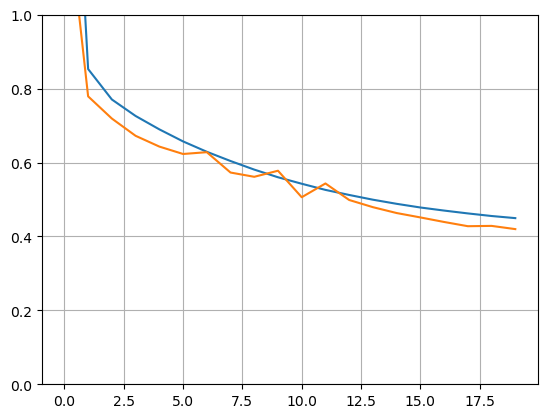

In [42]:
plt.plot(pd.DataFrame(MODELO_R.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

* azul: perca do treinamento 
* laranja: perca da validação 

In [43]:
y_pred

array([[0.5988779],
       [1.6615798],
       [3.1659725]], dtype=float32)

In [45]:
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [48]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.9915 - val_loss: 0.8683
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6588 - val_loss: 0.6888
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6088 - val_loss: 0.6218
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5802 - val_loss: 0.5375
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5560 - val_loss: 0.5189
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5349 - val_loss: 0.5125
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5176 - val_loss: 0.5021
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5030 - val_loss: 0.4741
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4884 - val_loss: 0.4563
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4763 - val_loss: 0.4543

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.4273 - val_loss: 1.4613
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8173 - val_loss: 0.6968
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6544 - val_loss: 0.6635
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5879 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5446 - val_loss: 0.5127
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5118 - val_loss: 0.4892
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4884 - val_loss: 0.4755
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4710 - val_loss: 0.4398
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4579 - val_loss: 0.4249
Epoch 10/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4490 - val_loss: 0.4169

## Exercícios

Exercício: Treine um MLP profundo no conjunto de dados MNIST (você pode carregá-lo usando keras.datasets.mnist.load_data(). Veja se consegue mais de 98% de precisão. Tente pesquisar a taxa de aprendizado ideal usando a abordagem apresentada neste capítulo (ou seja, aumentando a taxa de aprendizado exponencialmente, plotando a perda e encontrando o ponto em que a perda dispara.) Tente adicionar todos os sinos e assobios - salve os pontos de verificação, use a parada antecipada e plote as curvas de aprendizado usando o TensorBoard.

In [44]:
# carregando o conjunto de dados: